In [1]:
import pandas as pd
bp = pd.read_csv("ben_permission_4000.csv")
mp = pd.read_csv("mal_permission_4000.csv")
bc = pd.read_csv("ben_data_opcode_4000.csv")
mc = pd.read_csv("mal_data_opcode_4000.csv")
ben = pd.concat([bp, bc],axis = 1)
mal = pd.concat([mp, mc], axis =1)

In [2]:
#正样本标记为0，恶意样本标记为1
ben["label"] = 0
mal["label"] = 1

data = pd.concat([ben,mal[:1978]], ignore_index=True)
features = data.drop("label", axis=1)
labels = data["label"]
              
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=142)


0.96717171717171713

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.96717171717171713

In [5]:
rf.feature_importances_

array([  4.03764069e-03,   5.21671430e-05,   4.61829422e-04, ...,
         7.67051851e-04,   6.64933278e-04,   1.81288979e-03])

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=3000)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.98358585858585856

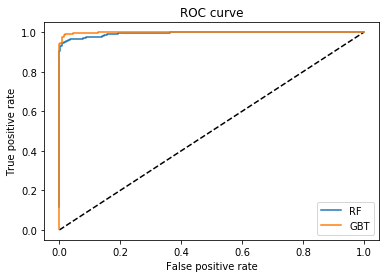

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

y_pred_gb = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_rf, tpr_rf, label='RF')

plt.plot(fpr_gb, tpr_gb, label='GBT')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_gb = roc_auc_score(y_test, y_pred_gb)
print(auc_rf)
print(auc_gb)

0.993719933302
0.998766985887


In [10]:
#正样本标记为0，恶意样本标记为1
bc["label"] = 0
mc["label"] = 1

In [11]:
data1 = pd.concat([bc,mc[:1978]], ignore_index=True)
features1 = data1.drop("label", axis=1)
labels1 = data1["label"]

In [12]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1,labels1,test_size=0.2,random_state=142)

In [13]:
rf1 = RandomForestClassifier(n_estimators=2100)
rf1.fit(X_train1,y_train1)
rf1.score(X_test1,y_test1)

0.95707070707070707

In [14]:
y_pred_rf1 = rf1.predict_proba(X_test1)[:, 1]
fpr_rf1, tpr_rf1, _ = roc_curve(y_test1, y_pred_rf1)

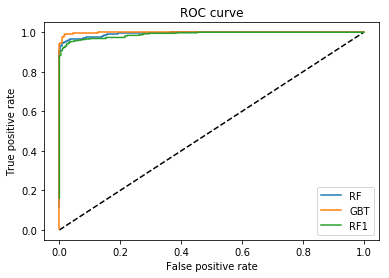

In [16]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_rf, tpr_rf, label='RF')

plt.plot(fpr_gb, tpr_gb, label='GBT')

plt.plot(fpr_rf1, tpr_rf1, label='RF1')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [17]:
auc_rf1 = roc_auc_score(y_test1, y_pred_rf1)
print(auc_rf1)

0.989634376178


In [23]:
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf_test = y_pred_rf

In [26]:
x = []
for i in y_pred_rf_test:
    x.append(i)
    
for i in y_pred_rf_test:
    if i > 0.5:
        x[x.index(i)] = 1
    else:
        x[x.index(i)] = 0
        
x

[0,
 1,
 1.0,
 1.0,
 1,
 0,
 0,
 1.0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0.0,
 1,
 1,
 1,
 0.0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1.0,
 1.0,
 1,
 0.0,
 0,
 1,
 1.0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 1,
 1,
 1.0,
 0.0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1.0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1.0,
 1,
 1,
 0,
 0,
 0,
 1,
 0.0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1.0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 1,
 0,
 1.0,
 0,
 0,
 1,
 0.0,
 0,
 0,
 1.0,
 1.0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0.0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1.0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1.0,
 1.0,
 0,
 1,
 1,
 1,
 1,
 0,
 1.0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1.0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1.0

In [36]:
y_predict_rf = rf.predict(X_test)
y_predict_gb = gb.predict(X_test)
y_predict_rf1 = rf1.predict(X_test1)

In [37]:
from sklearn import metrics
precision_score_rf = metrics.precision_score(y_test, y_predict_rf)
precision_score_gb = metrics.precision_score(y_test, y_predict_gb)
precision_score_rf1 = metrics.precision_score(y_test1, y_predict_rf1)

recall_score_rf = metrics.recall_score(y_test, y_predict_rf)
recall_score_gb = metrics.recall_score(y_test, y_predict_gb)
recall_score_rf1 = metrics.recall_score(y_test1, y_predict_rf1)

f1_score_rf = metrics.f1_score(y_test, y_predict_rf)
f1_score_gb = metrics.f1_score(y_test, y_predict_gb)
f1_score_rf1 = metrics.f1_score(y_test1, y_predict_rf1)

accuracy_score_rf = metrics.accuracy_score(y_test, y_predict_rf)
accuracy_score_gb = metrics.accuracy_score(y_test, y_predict_gb)
accuracy_score_rf1 = metrics.accuracy_score(y_test1, y_predict_rf1)

roc_auc_rf = roc_auc_score(y_test, y_predict_rf)
roc_auc_gb = roc_auc_score(y_test, y_predict_gb)
roc_auc_rf1 = roc_auc_score(y_test1, y_predict_rf1)

In [40]:
print(precision_score_rf1,recall_score_rf1,accuracy_score_rf1,f1_score_rf1,roc_auc_rf1)
print(precision_score_rf,recall_score_rf,accuracy_score_rf,f1_score_rf,roc_auc_rf)
print(precision_score_gb,recall_score_gb,accuracy_score_gb,f1_score_gb,roc_auc_gb)

0.957559681698 0.952506596306 0.957070707071 0.955026455026 0.956882838105
0.970666666667 0.960422163588 0.967171717172 0.965517241379 0.966893890511
0.989304812834 0.976253298153 0.983585858586 0.982735723772 0.983284034064


In [ ]:
from sklearn import metrics
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)
metrics.f1_score(y_true, y_pred)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, x)

array([[402,  11],
       [ 15, 364]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, x)

0.96717171717171713

In [30]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_rf)

0.99418441610835551

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, x, average=None)

array([ 0.9686747 ,  0.96551724])